<a href="https://colab.research.google.com/github/leo-contigo/ML/blob/main/08_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC(DecisionTreeClassifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### ML_10_학습자료.html

In [ ]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# DecisionTreeClassifier 결정트리

>- 스무고개 형태로 질문을 하나씩 던져서 정답을 맞추어 나간다.
>- sklearn의 DecisionTreeClassifier 클래스에서 제공
>- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만든다. (If-Else 기반 규칙)
>- 쉽고 직관적이다. 데이타의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적다.
>- 단점은 과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝이 필요하다.
>- GBM, XGBoodt, LightGBM과 같은 앙상블 학습기의 기반이 된다.

In [ ]:
# 관련 모듈
from sklearn.tree import DecisionTreeClassifier, plot_tree

# import 누르고 탭

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

# 평가표 metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 토이데이터 사용
from sklearn.datasets import load_iris

### 결정트리

In [ ]:
# 1) 데이터 준비

iris = load_iris()

X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

In [ ]:
# iris

In [ ]:
# 2) 데이터 분리 , 모델 생성 및 학습

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split( X , y , 
                                                    random_state=11,
                                                    stratify=y)

y_train.shape , y_test.shape

((112,), (38,))

In [ ]:
# 모델 생성

model_dt = DecisionTreeClassifier()
model_dt.fit( X_train , y_train)

DecisionTreeClassifier()

In [ ]:
# 3) 성능 평가

pred = model_dt.predict( X_test )
pred

array([1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1,
       1, 0, 2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1])

In [ ]:
accuracy_score(y_test, pred)

0.9736842105263158

In [ ]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
# 평가지표 보여주는 함수 classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
confusion_matrix(y_test, pred)

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]], dtype=int64)

In [ ]:
# 이미지 저장 폴더 생성

import os
os.mkdir('output')

In [ ]:
ls o*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 80D6-B655

 C:\Users\pnu\Desktop\9W 디렉터리

2022-07-14  오후 03:22    <DIR>          output
               0개 파일                   0 바이트
               1개 디렉터리  452,320,096,256 바이트 남음


In [ ]:
# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

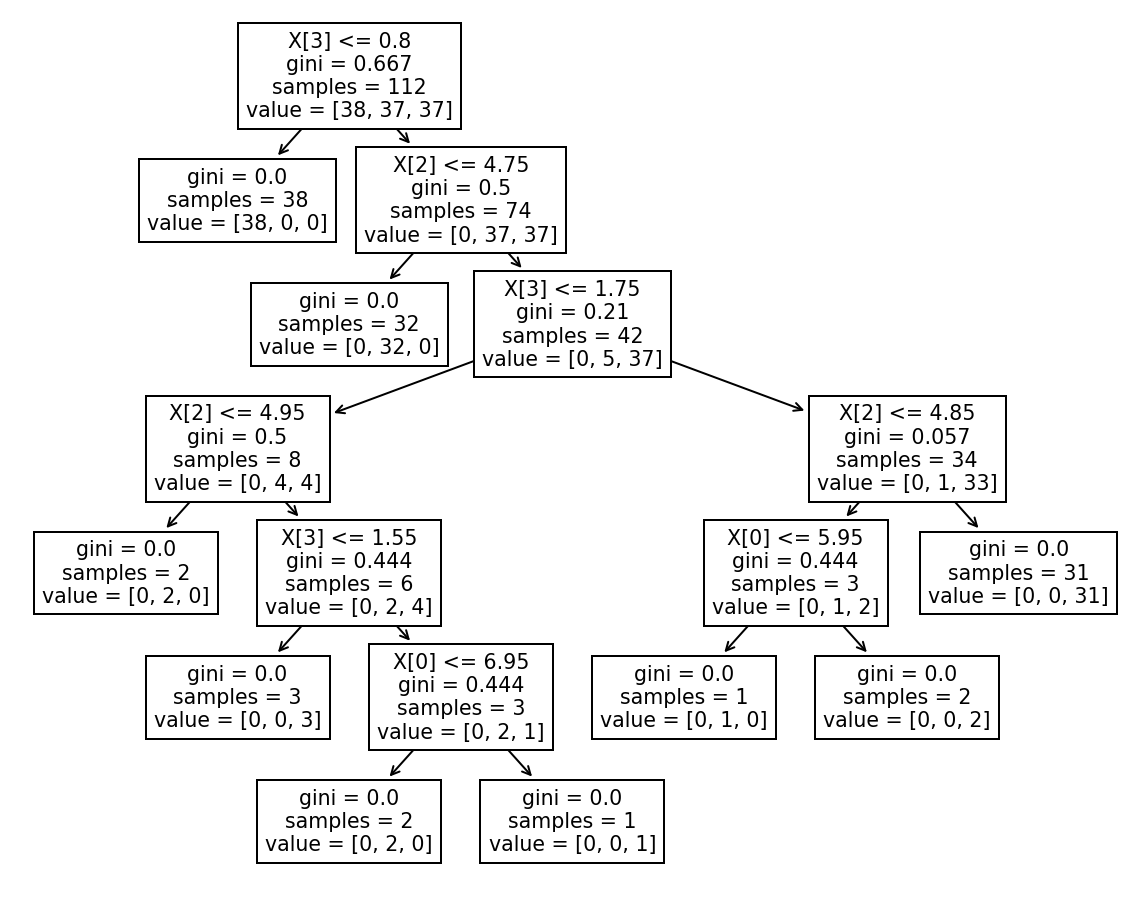

In [ ]:
# 4) plot_tree ( 관련 모듈 임포트 해야함 )
# from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))

plot_tree(model_dt)
plt.savefig('output/iris_tree1.png')
plt.show()

### plot_tree 세부 속성 제어

> - plot_tree(모델명, max_depth=n, filled=True, feature_names=컬럼명리스트)
> - max_depth 트리의 깊이 ( 트리의 가지? )
> - filled=True 클래스에 맞게 색상화
> - feature_names = 리스트 매개변수에 특성의 이름을 전달
> - class_names = 리스트. 타겟 클래스

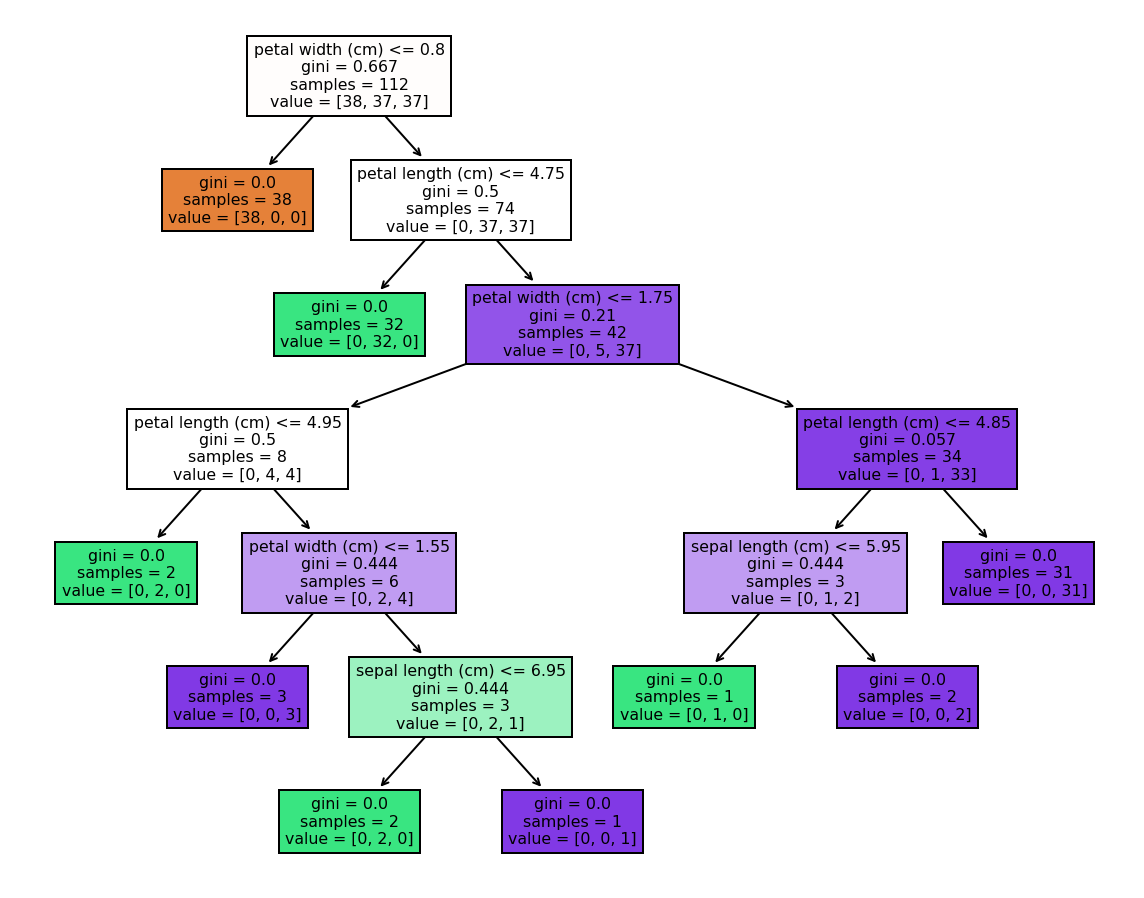

In [ ]:
plt.figure(figsize=(10,8))

plot_tree(model_dt, filled=True, feature_names=iris.feature_names)

plt.savefig('output/iris_tree2.png')

plt.show()

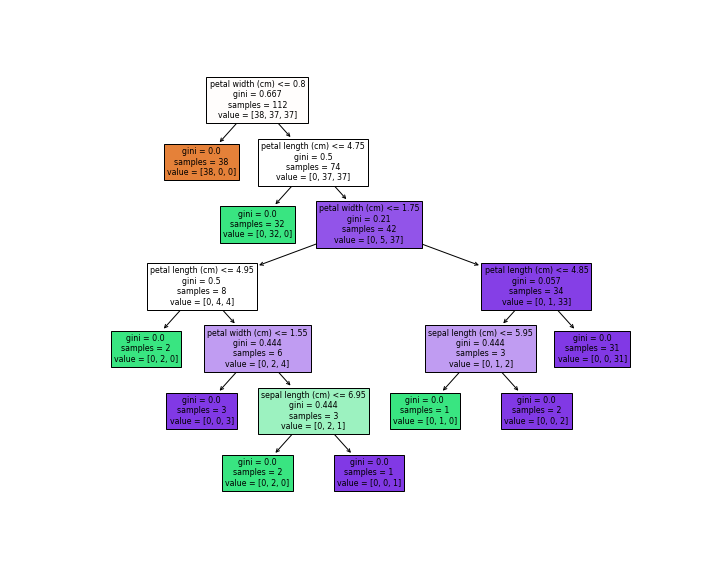

In [ ]:
# 쥬피터노트북 코드셀에 이미지 삽입 

from IPython.display import Image

Image(filename = 'output//iris_tree1.png')
Image(filename = 'output//iris_tree2.png')

# 마크다운 형태
# <img src=' 이미지 경로'>

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
 # X

In [ ]:
# 데이터 프레임으로 시각화

df_iris = pd.DataFrame(X , columns = iris.feature_names)
df_iris['label'] = y
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')

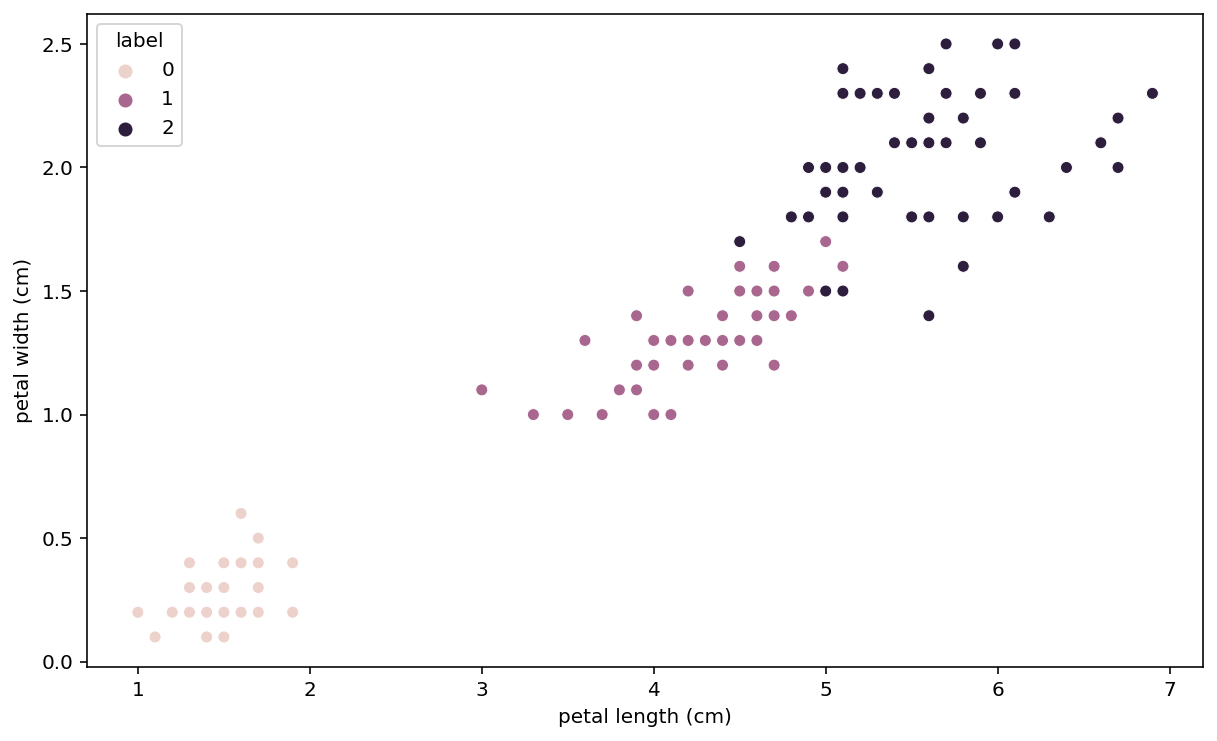

In [ ]:
# 시각화

sns.scatterplot( x = 'petal length (cm)' ,  y='petal width (cm)', data=df_iris, hue='label');

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

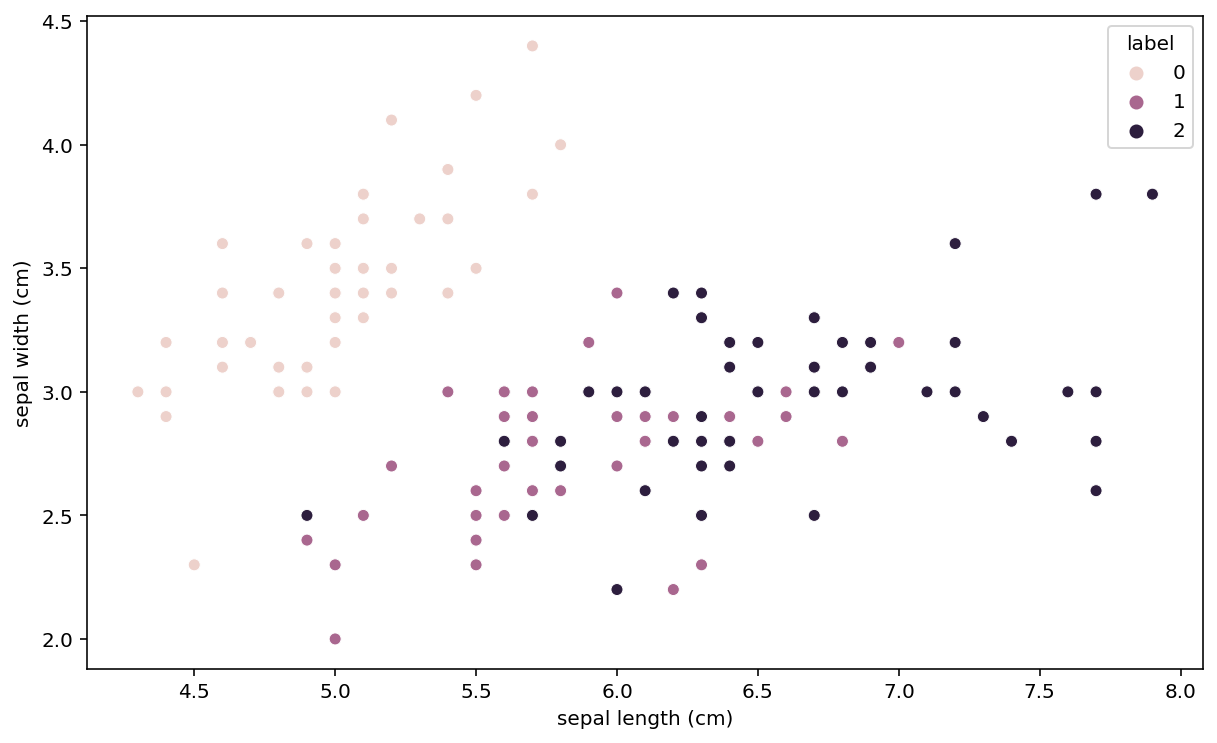

In [ ]:
sns.scatterplot( x='sepal length (cm)', y='sepal width (cm)', data=df_iris, hue='label');

### 중요도가 높은 컬럼( = 피처 = 독립변수 = 속성)

> - 모델명.feature_importances_

In [ ]:
print( dir(model_dt) )

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_prune_tree', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_X_predict', '_validate_data', 'apply', 'ccp_alpha', 'class_weight', 'classes_', 'cost_complexity_pruning_path', 'criterion', 'decision_path', 'feature_importances_', 'fit', 'get_depth', 'get_n_leaves', 'get_params', 'max_depth', 'max_features', 'max_features_', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_classes_', 'n_fea

In [ ]:
model_dt.feature_importances_

array([0.03571713, 0.        , 0.40358109, 0.56070177])

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

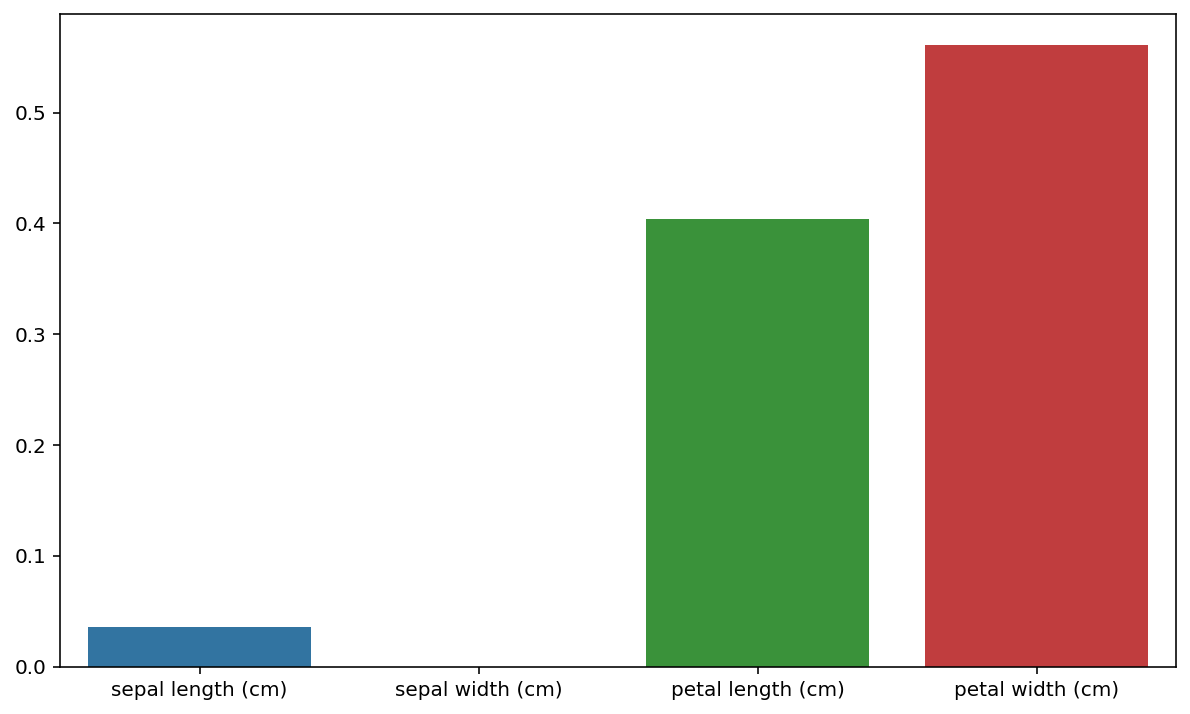

In [ ]:
# 중요도 시각화 1-1

sns.barplot ( x = iris.feature_names, y = model_dt.feature_importances_);

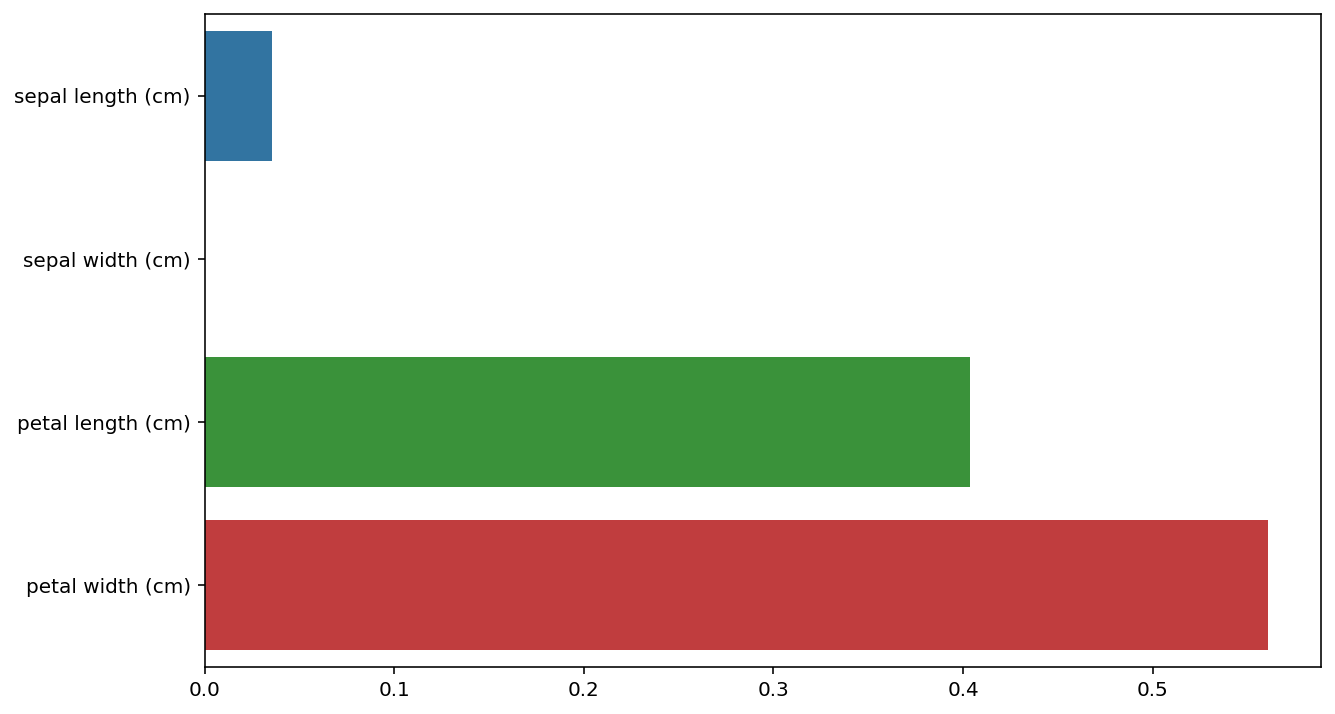

In [ ]:
# 중요도 시각화 1-2

sns.barplot ( y = iris.feature_names, x = model_dt.feature_importances_);


----------------------------------------

### 그리드 서치를 이용해서 모델의 최적 파라미터 구하기

In [ ]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# 파라미터 지정 - 딕셔너리

parameters = { 'max_depth' : [ 4 , 6 , 8 , 10 ]}

# 그리드 서치 모델 객체 생성
model_dt_grid = GridSearchCV( model_dt , 
                             param_grid = parameters,
                            cv=5,
                            scoring='accuracy',
                            verbose=1)

# 그리드 서치 모델 이용해서 학습
model_dt_grid.fit(X_train , y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10]}, scoring='accuracy',
             verbose=1)

In [ ]:
model_dt_grid.cv_results_

{'mean_fit_time': array([0.00059829, 0.00019946, 0.00039878, 0.00019937]),
 'std_fit_time': array([0.00048857, 0.00039892, 0.0004884 , 0.00039873]),
 'mean_score_time': array([0.00019951, 0.00019951, 0.00019932, 0.00039897]),
 'std_score_time': array([0.00039902, 0.00039902, 0.00039864, 0.00048864]),
 'param_max_depth': masked_array(data=[4, 6, 8, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 4},
  {'max_depth': 6},
  {'max_depth': 8},
  {'max_depth': 10}],
 'split0_test_score': array([0.86956522, 0.86956522, 0.91304348, 0.91304348]),
 'split1_test_score': array([0.86956522, 0.73913043, 0.7826087 , 0.73913043]),
 'split2_test_score': array([1., 1., 1., 1.]),
 'split3_test_score': array([0.95454545, 0.90909091, 0.95454545, 0.95454545]),
 'split4_test_score': array([0.95454545, 0.95454545, 0.95454545, 0.95454545]),
 'mean_test_score': array([0.92964427, 0.8944664 , 0.92094862, 0.91225296]),
 'std_test_s

In [ ]:
# 평가자료 확인 - 데이터프레임으로 변경
pd.DataFrame(model_dt_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000598,0.000489,0.000200,0.000399,4,{'max_depth': 4},0.869565,0.869565,1.0,0.954545,0.954545,0.929644,0.051786,1
1,0.000199,0.000399,0.000200,0.000399,6,{'max_depth': 6},0.869565,0.739130,1.0,0.909091,0.954545,0.894466,0.089118,4
2,0.000399,0.000488,0.000199,0.000399,8,{'max_depth': 8},0.913043,0.782609,1.0,0.954545,0.954545,0.920949,0.074441,2
3,0.000199,0.000399,0.000399,0.000489,10,{'max_depth': 10},0.913043,0.739130,1.0,0.954545,0.954545,0.912253,0.090828,3


In [ ]:
# 최적의 파라미터 및 모델 확인

print('최적의 파라미터 값은? ', model_dt_grid.best_params_)
print('최고 점수는 ', model_dt_grid.best_score_)
model_dt_grid.best_estimator_.get_params()

최적의 파라미터 값은?  {'max_depth': 4}
최고 점수는  0.9296442687747035


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# 최적의 모델로 학습시키기 
model_dt_grid.best_estimator_.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=4)

In [ ]:
# 구한 파라미터로 다시 모델 생성후 학습 
model_dt2 = DecisionTreeClassifier(max_depth=4, random_state=11)
model_dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=11)

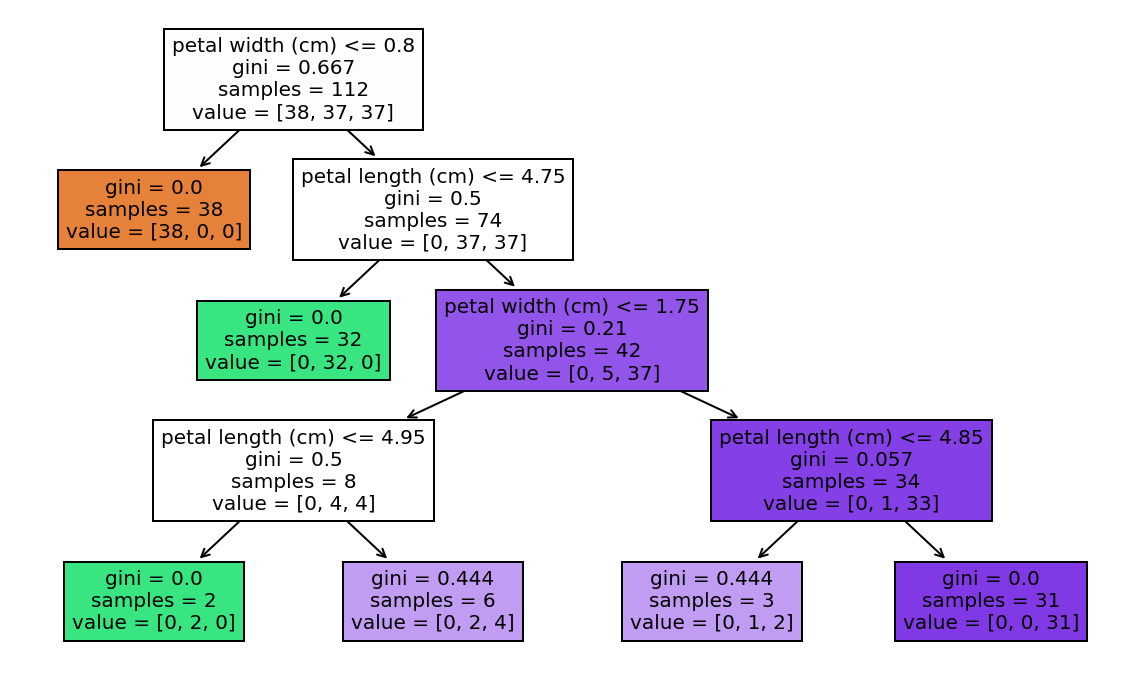

In [ ]:
# plot_tree(model_dt , max_depth=4, filled=True, feature_names=iris.feature_names)
# ↑ 이건 아님

# 최적의 모델로 다시 그리기
plot_tree(model_dt_grid.best_estimator_, filled=True, feature_names=iris.feature_names)
plt. show()

In [ ]:
model_dt_grid.best_estimator_.score( X_test, y_test)

0.9736842105263158

In [ ]:
confusion_matrix( y_test, model_dt_grid.best_estimator_.predict(X_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]], dtype=int64)